In [1]:
%matplotlib inline 
#to include graphs next to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='11_15_Dortmund_Duisburg_trimmed.csv'
data1 = pd.read_csv(file)


#get the overview of the data


print(data1.describe()) #statistics 

         Unnamed: 0  ...  totalWaitingTime
count    303.000000  ...        303.000000
mean    9099.693069  ...       1283.689769
std     6625.895550  ...       3573.625941
min        0.000000  ...          0.000000
25%     3026.000000  ...          0.000000
50%     7802.000000  ...          0.000000
75%    15716.000000  ...          0.000000
max    21286.000000  ...      20875.000000

[8 rows x 6 columns]


In [2]:
print(data1.head(10)) #return first 10 rows in the data frame

   Unnamed: 0  totalTravelTimeInSec  ...  sourceName  targetName
0           0               14742.0  ...    Dortmund    Duisburg
1           1                6675.0  ...    Dortmund    Duisburg
2          83                6315.0  ...    Dortmund    Duisburg
3          86                5415.0  ...    Dortmund    Duisburg
4          95                4275.0  ...    Dortmund    Duisburg
5         107                4215.0  ...    Dortmund    Duisburg
6         108                2284.0  ...    Dortmund    Duisburg
7         127                2164.0  ...    Dortmund    Duisburg
8         129                2164.0  ...    Dortmund    Duisburg
9         130                2284.0  ...    Dortmund    Duisburg

[10 rows x 12 columns]


In [3]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               303 non-null    int64  
 1   totalTravelTimeInSec     303 non-null    float64
 2   totalPrice               303 non-null    float64
 3   totalNumberOfChanges     303 non-null    int64  
 4   totalWalkingDistance     303 non-null    float64
 5   totalWaitingTime         303 non-null    int64  
 6   objective                303 non-null    object 
 7   finiteAutomaton          303 non-null    object 
 8   consideredPreferences    303 non-null    object 
 9   finalSolutionUsedLabels  303 non-null    object 
 10  sourceName               303 non-null    object 
 11  targetName               303 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 28.5+ KB
None


In [4]:

#column to drop: unnamed: we do not need it for our further analysis (check the meaning with Thomas?)
data_valid = data1.iloc[: , 1:]

In [5]:
print(data_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   totalTravelTimeInSec     303 non-null    float64
 1   totalPrice               303 non-null    float64
 2   totalNumberOfChanges     303 non-null    int64  
 3   totalWalkingDistance     303 non-null    float64
 4   totalWaitingTime         303 non-null    int64  
 5   objective                303 non-null    object 
 6   finiteAutomaton          303 non-null    object 
 7   consideredPreferences    303 non-null    object 
 8   finalSolutionUsedLabels  303 non-null    object 
 9   sourceName               303 non-null    object 
 10  targetName               303 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 26.2+ KB
None


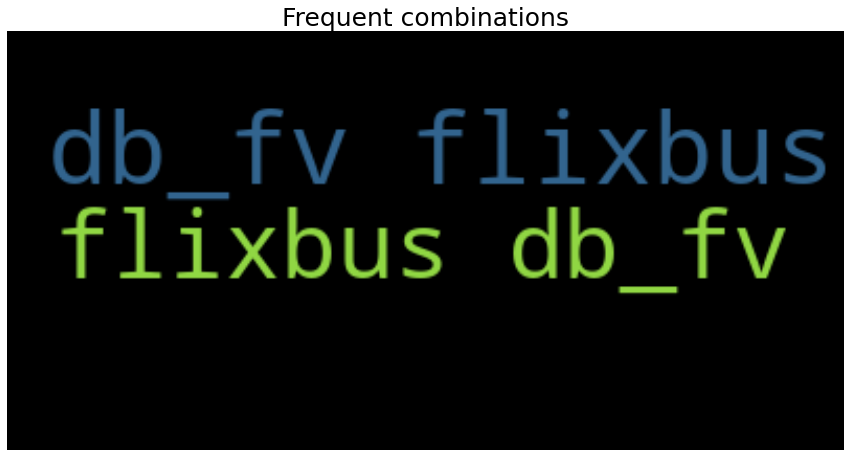

In [6]:
#for the sake of exploratory analysis have an idea to explore frequency of the proposed solutions
from wordcloud import WordCloud
#join each element of the column name in our dataset
txt =" ".join(str(each) for each in data_valid.finalSolutionUsedLabels)
# create and generate a word cloud image, set a max range of words-top 2
name_wordcloud = WordCloud(max_words=2, background_color="black").generate(txt)
plt.figure(figsize=(15,10))
#display the generated image:
#nn bilinear interpolation, a linear interpolation is first performed between pixels in the horizontal (X) direction of the image and then in the Y direction (or vice-versa)
plt.imshow(name_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Frequent combinations',size = 25) #set the figure size
plt.show()
#draw a conclusion about the frequency 
#as we can see, the most proposed mode of travel is land-based and includes bus or rail transportation


In [7]:
#categorize the unique values for solutions

print(data_valid.finalSolutionUsedLabels.astype('category')) #cast the objects
#7 unique combinations were revealed

0      [flixbus, blablacar]
1          [flixbus, db_fv]
2          [flixbus, db_fv]
3          [flixbus, db_fv]
4          [flixbus, db_fv]
               ...         
298                 [db_fv]
299        [flixbus, db_fv]
300        [flixbus, db_fv]
301    [flixbus, blablacar]
302        [flixbus, db_fv]
Name: finalSolutionUsedLabels, Length: 303, dtype: category
Categories (7, object): ['[blablacar]', '[car]', '[db_fv, flixbus]', '[db_fv]',
                         '[flixbus, blablacar]', '[flixbus, db_fv]', '[flixbus]']


In [8]:
#check which column contains missing values and the percentage
#iterate through columns (11) of our Data set
for col in data_valid.columns:
    prct = np.mean(data1[col].isnull()) #get the ratio using np.mean function
    print('{}:{}%'.format(col, round(prct*100)))

    #clearly, we do not have missing values in the prepared data file

totalTravelTimeInSec:0%
totalPrice:0%
totalNumberOfChanges:0%
totalWalkingDistance:0%
totalWaitingTime:0%
objective:0%
finiteAutomaton:0%
consideredPreferences:0%
finalSolutionUsedLabels:0%
sourceName:0%
targetName:0%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


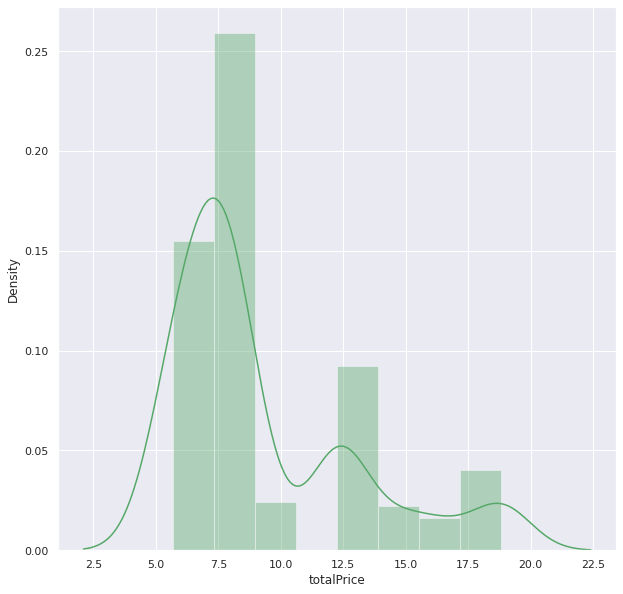

In [9]:
#have a look at the total price distribution
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(data_valid['totalPrice'], color='g')

#the price distribution is not normally distributed
#can conclude that the majority of prices have value between 7,5 and 9 euros

In [10]:
#Skewness-a measure of how much a distribution leans to the left or to the right
#checked that travel time is positively skewed 
#meaning of that: mode> median> mean in the distribution
print('Skewness: {}'.format(data_valid['totalTravelTimeInSec'].skew())) #format the text

#Kurtosis-a measure of thickness of the tails of a distribution
#high Kurtosis value means extreme high and low values as outliers
#from not high Kurtosis value we can conclude that our data does not have extreme outliers
print('Kurtosis: {}'.format(data_valid['totalTravelTimeInSec'].kurt()))

Skewness: 1.4580209709224108
Kurtosis: 1.5831014218000932


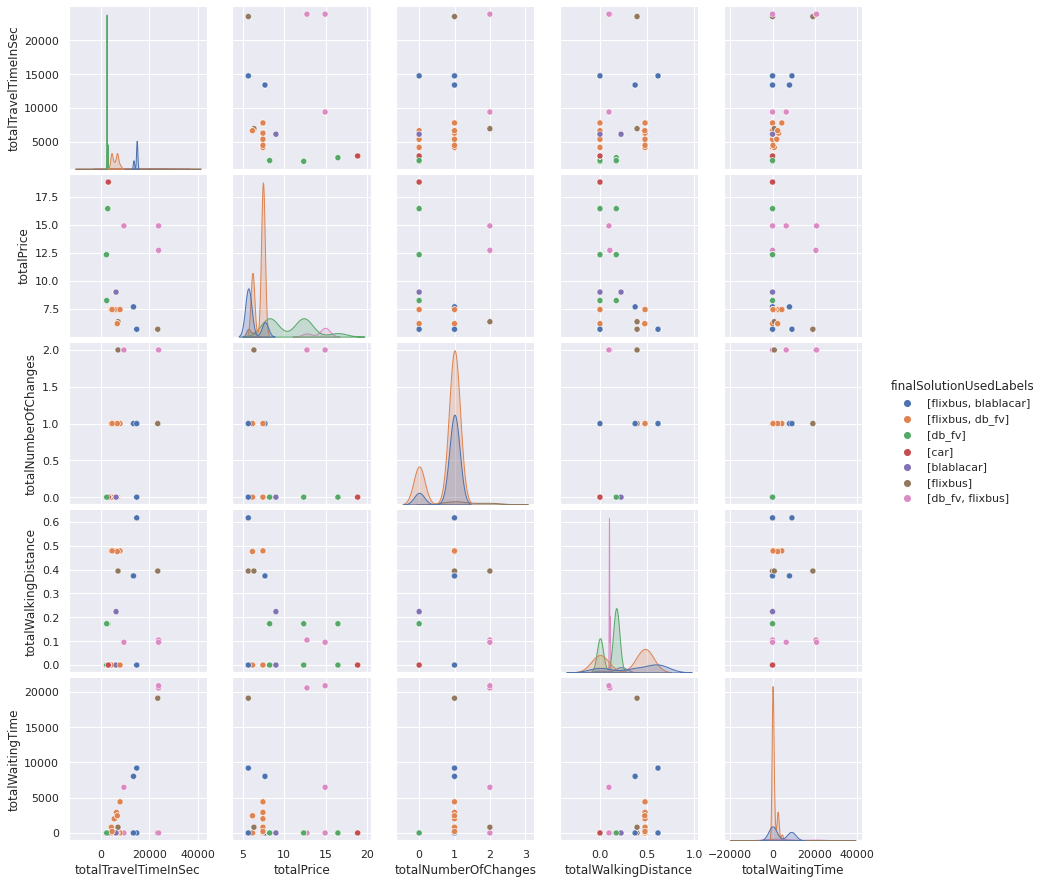

In [11]:
#get the pairplot to understand the a relationship between two variables 
#determine the color for different mode choices in general
sns.pairplot(data_valid,vars=['totalTravelTimeInSec','totalPrice','totalNumberOfChanges','totalWalkingDistance', 'totalWaitingTime'],hue='finalSolutionUsedLabels')

#short conclusion: total price is the highest for car option, customer has to have more transfers combinin railway and bus as well as using just a bus,
#have to walk more having car and flixbus

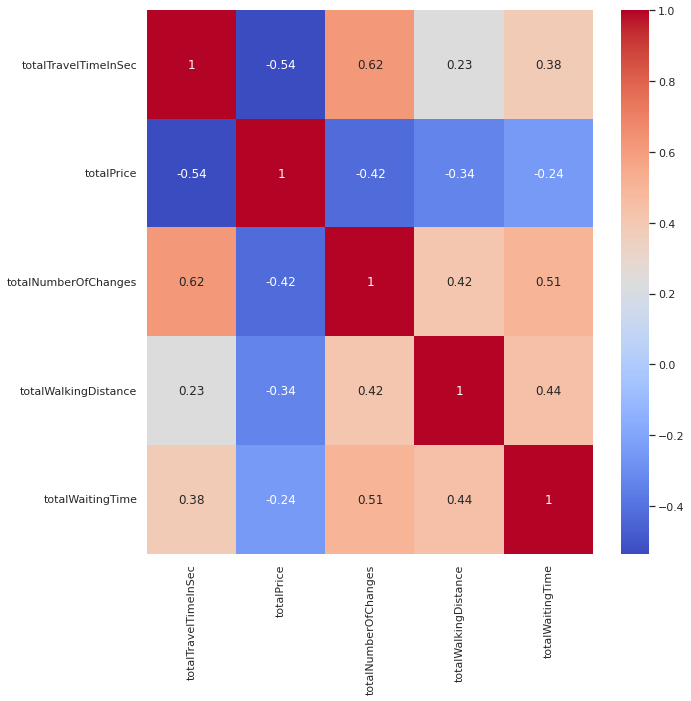

In [13]:
#build the correlation matrix for total price and other numerical columns to see how high the correlation is

selected = data_valid[['totalTravelTimeInSec','totalPrice','totalNumberOfChanges','totalWalkingDistance', 'totalWaitingTime']] #pick the columns
show=selected.corr(method='kendall') #compute pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(show,annot=True,cmap='coolwarm')

# reference:https://www.statisticssolutions.com/pearsons-correlation-coefficient/
# meaning of correlation number
# Perfect: If the value is near ± 1, then it said to be a perfect correlation
# High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
# Low degree: When the value lies below ± 0.29, then it is said to be a small correlation.
# No correlation: When the value is zero.

#short conclusion for this part: travel time is highly correlated with number of changes and price, as well as total number of changes with waiting time


Text(0, 0.5, 'Count')

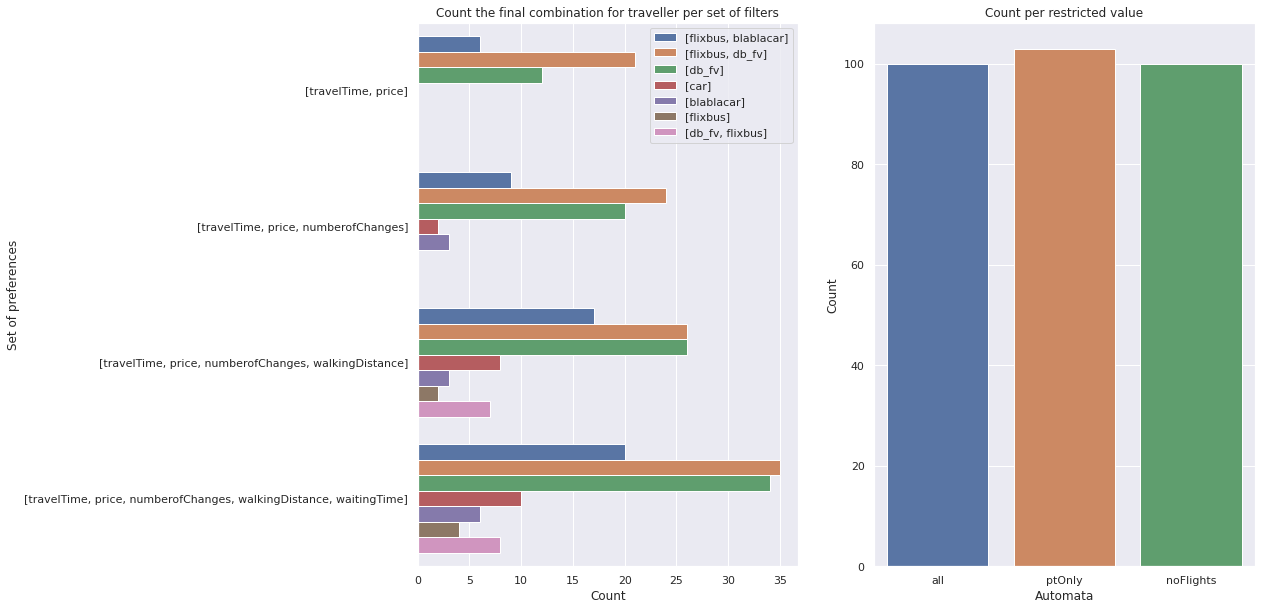

In [27]:
fig, axes = plt.subplots(1,2,figsize=(15,10))#unpack the tuple into the variables fig and axes
#plot final solutions proposed with respect to the considered preferences
#we use the combination of bus and railway or just railway mostly if we have all 5 preferences considered simultaneously
plt.subplot(121)
sns.countplot(y="consideredPreferences", hue="finalSolutionUsedLabels", data=data_valid); #set the parametres
plt.legend(loc='upper right')
plt.title('Count the final combination for traveller per set of filters')
plt.xlabel('Count')
plt.ylabel("Set of preferences")

plt.subplot(122)
#plot the count of all finite Automata= restrictions on the travel mode used
#most utilized is public transport only
sns.countplot(x=data_valid['finiteAutomaton'])
plt.title("Count per restricted value")
plt.xlabel('Automata')
plt.ylabel("Count")

Text(0.5, 0, 'Distance by foot')

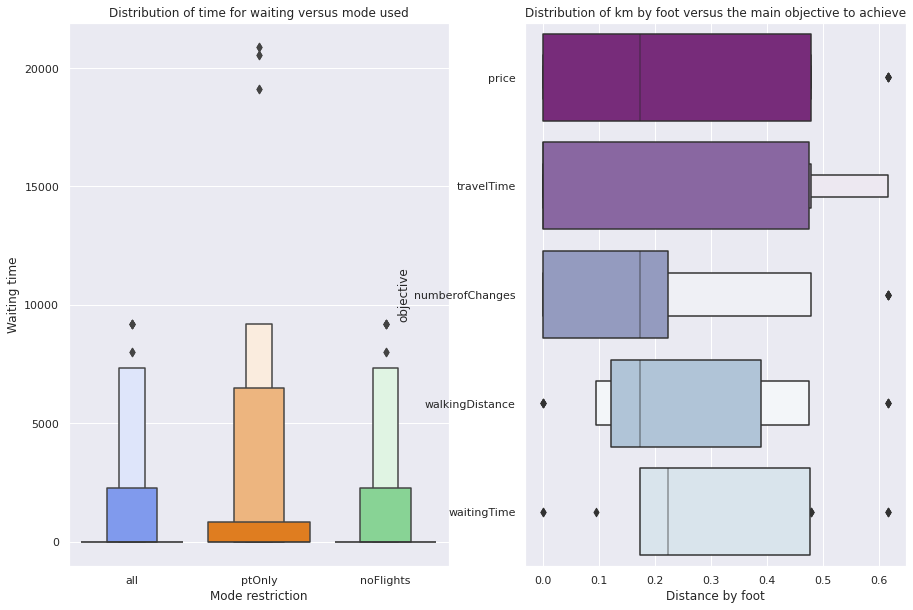

In [49]:
fig, axes = plt.subplots(2,1,figsize=(15,10))#unpack the tuple into the variables fig and axes
#plot the boxenplot the see the relationship between waiting time and permitted mode 
#usage of public transportation only influences in increasing of time for waiting
plt.subplot(121)
sns.boxenplot(data=data_valid, x='finiteAutomaton',y='totalWaitingTime',palette='bright') #pick the inner parametres for plotting
plt.title('Distribution of time for waiting versus mode used')
plt.xlabel('Mode restriction')
plt.ylabel("Waiting time")

#plot the boxenplot the examine the relationship between distance to cover by a person and the main filtering goal
#observation-if main objective walking distance- still for some cases coverage by foot is necessity 
plt.subplot(122)
sns.boxenplot(data=data_valid, x='totalWalkingDistance',y='objective',palette='BuPu_r')#pick the inner parametres for plotting
plt.title('Distribution of km by foot versus the main objective to achieve')
plt.xlabel('Distance by foot')




In [45]:
#provide an overview of the most popular transfers

most_popular_tr=data_valid.totalNumberOfChanges.value_counts().head(3) #return a series containing counts of unique values
most_popular_tr

0    151
1    135
2     17
Name: totalNumberOfChanges, dtype: int64

Text(0.5, 1.0, 'The most popular transfer quantity')

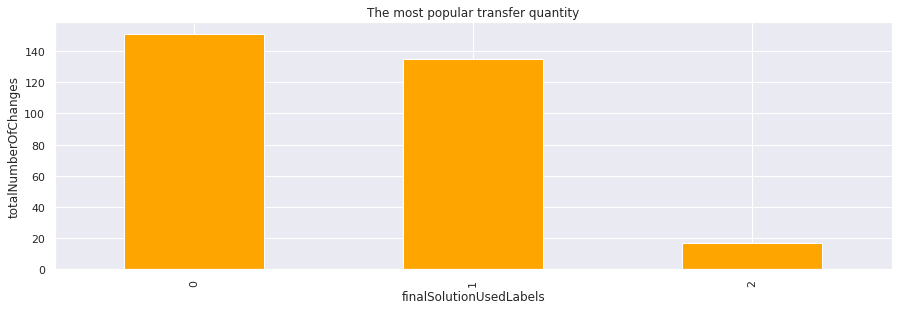

In [48]:
fig, axes = plt.subplots(figsize=(15,10))

#visually checked that the top proposed number of changes by the Algorithm, 0 changes, continuous travel is the most popular
plt.subplot(211)
most_popular_tr.plot(kind='bar',color='orange')#set up inner parametres
plt.xlabel("finalSolutionUsedLabels", size = 12)
plt.ylabel("totalNumberOfChanges", size =12)
plt.title("The most popular transfer quantity", size = 12)

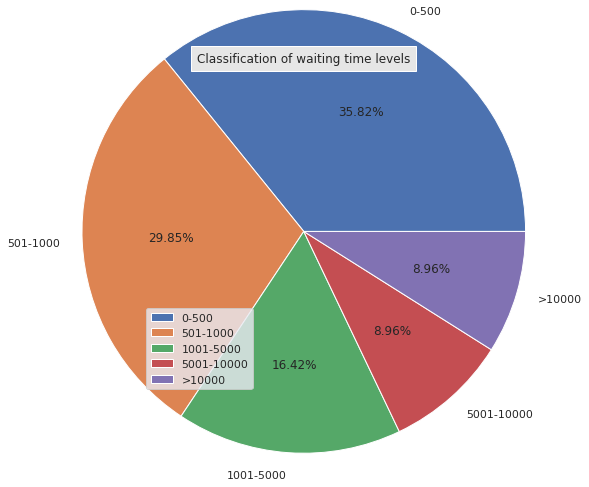

1283.6897689768978

In [56]:
#to have an idea about total waiting time, the most common quantity is from 0 to 500 seconds
data_time = data_valid[:] #slice for every element
data_time["totalWaitingTime"] = data_valid["totalWaitingTime"].astype(int) #specify the column and dtype we need
bins = [0,500,1000,5000,10000,25000] #create a list of bins
labels = ['0-500','501-1000','1001-5000','5001-10000','>10000'] #create the list of labels
data_time['waiting_cat'] = pd.cut(data_time["totalWaitingTime"], bins=bins, labels=labels) #bin values into discrete intervals
data_time.head()
plt.figure(figsize=(8,6)) 

#count and enter percentages inside the shape
plt.pie(data_time['waiting_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.7)#parametres
plt.legend(loc="lower left") #location of the figure
plt.title("Classification of waiting time levels", bbox={'facecolor':'0.9', 'pad':6}, loc = "center")#play with the title
plt.show()


#in average the customer would have to wait in seconds
data_valid["totalWaitingTime"].mean()

Text(0.5, 1.0, 'Distribution of walking distance km in accordance with the preference list')

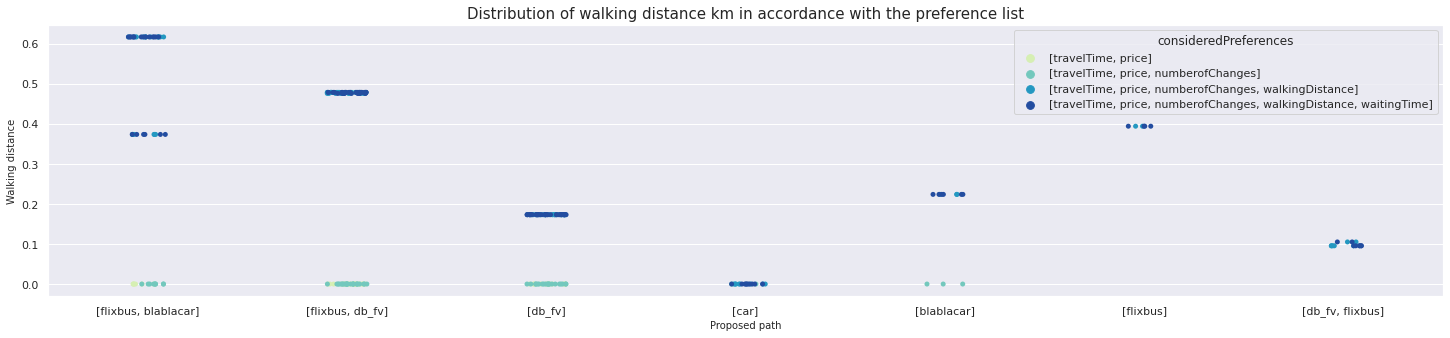

In [68]:
#observed different distribution of walking distance
#in general having more preferences simultaneously included- the clients have to cover the distances by foot more
plt.figure(figsize=(25, 5))

sns.stripplot(x=data_valid['finalSolutionUsedLabels'],y=data_valid['totalWalkingDistance'],hue=data_valid['consideredPreferences'],palette='YlGnBu')#configure the axis
plt.xlabel("Proposed path", size = 10)
plt.ylabel("Walking distance", size = 10)
plt.title('Distribution of walking distance km in accordance with the preference list',fontsize=15)